<a href="https://colab.research.google.com/github/zinseo964/dam_flow/blob/main/damwithday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
rain_data211 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172151.csv',encoding='cp949')
rain_data101 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172202.csv',encoding='cp949')
rain_data100 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172215.csv',encoding='cp949')
rain_data212 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172236.csv',encoding='cp949')
rain_data90 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/rn_20240130172245.csv',encoding='cp949')

In [4]:
# rain_data = pd.merge(rain_data211, rain_data101, how='outer')
from functools import reduce

rain_data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data211, rain_data101, rain_data100, rain_data212, rain_data90])

In [5]:
print(rain_data)

              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         NaN         NaN         NaN         NaN        NaN
1     2009-01-02         NaN         NaN         NaN         NaN        NaN
2     2009-01-03         NaN         NaN         NaN         NaN        NaN
3     2009-01-04         NaN         NaN         NaN         NaN        NaN
4     2009-01-05         NaN         NaN         NaN         NaN        NaN
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         NaN         NaN         NaN         NaN        NaN
5474  2023-12-28         NaN         NaN         NaN         NaN        NaN
5475  2023-12-29         NaN         NaN         NaN         NaN        NaN
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [6]:
rain_col = [i for i in rain_data.columns if '강수' in i]
rain_data[rain_col] = rain_data[rain_col].fillna(0)

In [7]:
print(rain_data.isna().sum().sum())
print(rain_data)

0
              날짜  211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)
0     2009-01-01         0.0         0.0         0.0         0.0        0.0
1     2009-01-02         0.0         0.0         0.0         0.0        0.0
2     2009-01-03         0.0         0.0         0.0         0.0        0.0
3     2009-01-04         0.0         0.0         0.0         0.0        0.0
4     2009-01-05         0.0         0.0         0.0         0.0        0.0
...          ...         ...         ...         ...         ...        ...
5473  2023-12-27         0.0         0.0         0.0         0.0        0.0
5474  2023-12-28         0.0         0.0         0.0         0.0        0.0
5475  2023-12-29         0.0         0.0         0.0         0.0        0.0
5476  2023-12-30         6.8         9.9         2.3         8.5        0.7
5477  2023-12-31         3.1         5.3         6.0         4.9       26.8

[5478 rows x 6 columns]


In [8]:
dam_flow = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dam_flow_csv/only_dam_flow.csv',encoding='utf-8')

print(dam_flow)

              날짜  유입량(㎥/s)
0     2009-01-01     0.000
1     2009-01-02     0.825
2     2009-01-03     3.904
3     2009-01-04     0.000
4     2009-01-05     0.000
...          ...       ...
5473  2023-12-27    25.873
5474  2023-12-28    21.186
5475  2023-12-29    20.887
5476  2023-12-30    29.183
5477  2023-12-31    25.803

[5478 rows x 2 columns]


In [9]:
data = reduce(lambda x,y : pd.merge(x,y, on='날짜', how='outer'),[rain_data, dam_flow])

In [10]:
print(max(data['유입량(㎥/s)']))

3918.5


<Axes: xlabel='날짜'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


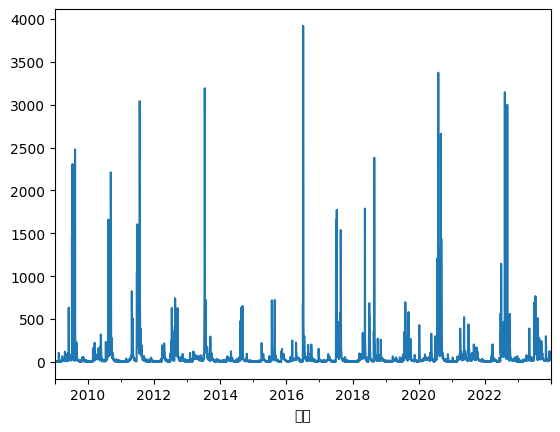

In [11]:
data.index = pd.to_datetime(data['날짜'])

dam_flow = data['유입량(㎥/s)']
dam_flow.plot()

In [12]:
data['Y'] = data['유입량(㎥/s)'].shift(-2)
data = data.dropna()

train = data[data['날짜']<'2018-01-01']
valid = data[data['날짜']>='2018-01-01']
valid = valid[valid['날짜']<'2023-01-01']
test = data[data['날짜']>='2023-01-01']
print('train set : ', len(train),"\n",
      'valid set : ', len(valid), "\n",
      'test set : ', len(test), "\n")

trainX, trainY = train.drop(['날짜', 'Y'], axis = 1), train['Y']
validX, validY = valid.drop(['날짜', 'Y'], axis = 1), valid['Y']
testX, testY = test.drop(['날짜', 'Y'], axis = 1), test['Y']

train set :  3287 
 valid set :  1826 
 test set :  363 



In [13]:
print(trainX)
len(trainX.columns)


            211강수량(mm)  101강수량(mm)  100강수량(mm)  212강수량(mm)  90강수량(mm)  \
날짜                                                                      
2009-01-01         0.0         0.0         0.0         0.0        0.0   
2009-01-02         0.0         0.0         0.0         0.0        0.0   
2009-01-03         0.0         0.0         0.0         0.0        0.0   
2009-01-04         0.0         0.0         0.0         0.0        0.0   
2009-01-05         0.0         0.0         0.0         0.0        0.0   
...                ...         ...         ...         ...        ...   
2017-12-27         0.0         0.0         0.0         0.0        0.0   
2017-12-28         0.0         0.0         0.0         0.0        0.0   
2017-12-29         0.0         0.0         0.0         0.0        0.0   
2017-12-30         0.4         1.0         0.3         0.6        0.0   
2017-12-31         1.0         1.1         0.0         2.0        0.0   

            유입량(㎥/s)  
날짜                    
2009

6

<Axes: xlabel='날짜'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


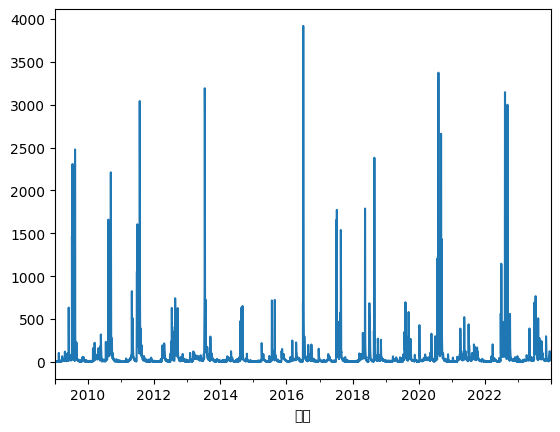

In [14]:
temp = data['유입량(㎥/s)']
temp.plot()

In [18]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import *
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((6, 1)))
model1.add(LSTM(64))
model1.add(Dense(40, 'relu'))
model1.add(Dense(40, 'relu'))
model1.add(Dense(8, 'relu'))
model1.add(Dense(8))
model1.add(Dense(1))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 40)                2600      
                                                                 
 dense_7 (Dense)             (None, 40)                1640      
                                                                 
 dense_8 (Dense)             (None, 8)                 328       
                                                                 
 dense_9 (Dense)             (None, 8)                 72        
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 21545 (84.16 KB)
Trainable params: 21545

In [19]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])
model1.fit(trainX, trainY, validation_data = (validX, validY), batch_size=10, epochs=50, callbacks=[cp1])

Epoch 1/50
329/329 [==============================] - 11s 24ms/step - loss: 44881.3047 - root_mean_squared_error: 211.8521 - val_loss: 48404.1602 - val_root_mean_squared_error: 220.0095
Epoch 2/50
329/329 [==============================] - 7s 22ms/step - loss: 43384.5391 - root_mean_squared_error: 208.2896 - val_loss: 45216.7422 - val_root_mean_squared_error: 212.6423
Epoch 3/50
329/329 [==============================] - 6s 19ms/step - loss: 40520.2305 - root_mean_squared_error: 201.2964 - val_loss: 42421.6562 - val_root_mean_squared_error: 205.9652
Epoch 4/50
329/329 [==============================] - 8s 24ms/step - loss: 38178.5781 - root_mean_squared_error: 195.3934 - val_loss: 40198.4961 - val_root_mean_squared_error: 200.4956
Epoch 5/50
329/329 [==============================] - 7s 21ms/step - loss: 36011.4805 - root_mean_squared_error: 189.7669 - val_loss: 38218.3633 - val_root_mean_squared_error: 195.4952
Epoch 6/50
329/329 [==============================] - 7s 21ms/step - loss:

In [20]:
train_score = model1.evaluate(testX, testY, verbose=1)
print('Train Score: %.2f MSE (%.2f RMSE)' % (train_score[0], np.sqrt(train_score[0])))

12/12 [==============================] - 0s 4ms/step - loss: 8476.8711 - root_mean_squared_error: 92.0699
Train Score: 8476.87 MSE (92.07 RMSE)


In [21]:
train_predictions = model1.predict(trainX).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':trainY})
train_results

103/103 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
날짜,,
2009-01-01,4.643130,3.904
2009-01-02,5.225464,0.000
2009-01-03,7.631891,0.000
2009-01-04,4.643130,0.312
2009-01-05,4.643130,0.391
...,...,...
2017-12-27,4.660381,5.957
2017-12-28,4.717636,6.000
2017-12-29,9.432632,0.285


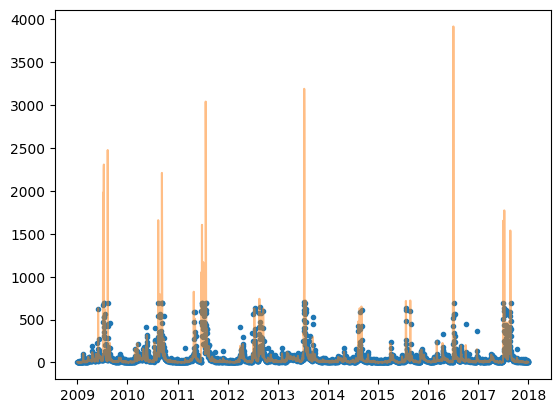

In [25]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:],'.')
plt.plot(train_results['Actuals'][:],alpha = 0.5)

In [23]:
val_predictions = model1.predict(validX).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':validY})
val_results

58/58 [==============================] - 0s 6ms/step


,Val Predictions,Actuals
날짜,,
2018-01-01,6.654742,2.894
2018-01-02,6.725977,0.000
2018-01-03,6.814333,0.000
2018-01-04,4.643130,8.841
2018-01-05,4.643130,3.292
...,...,...
2022-12-27,9.113551,9.218
2022-12-28,14.125332,4.597
2022-12-29,12.090334,7.110


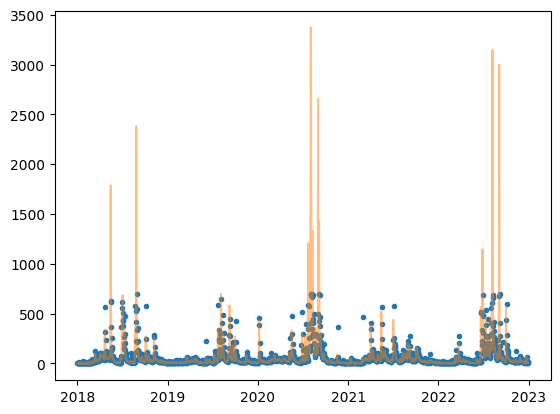

In [26]:
plt.plot(val_results['Val Predictions'][:],'.')
plt.plot(val_results['Actuals'][:], alpha = 0.5)


In [27]:
test_predictions = model1.predict(testX).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':testY})
test_results

12/12 [==============================] - 0s 3ms/step


,Test Predictions,Actuals
날짜,,
2023-01-01,10.531862,3.597
2023-01-02,9.006161,4.283
2023-01-03,7.395600,1.909
2023-01-04,7.963347,7.096
2023-01-05,6.044804,3.040
...,...,...
2023-12-25,32.803383,25.873
2023-12-26,31.343842,21.186
2023-12-27,27.311279,20.887


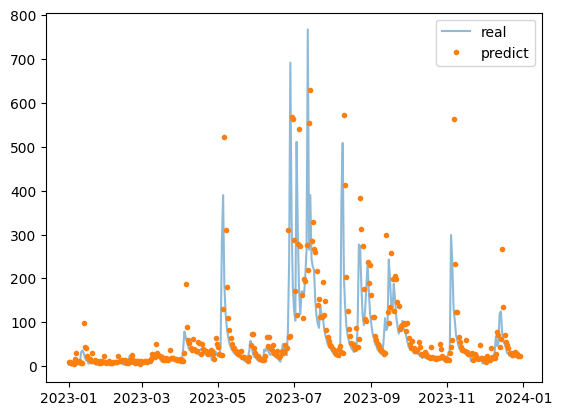

In [29]:
plt.plot(test_results['Actuals'][:],alpha =0.5)
plt.plot(test_results['Test Predictions'][:],'.')
plt.legend(['real', 'predict'])

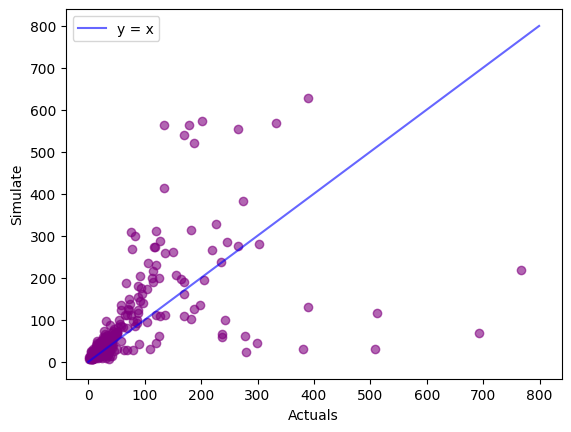

In [31]:
x = np.arange(0,800)
y = x
plt.scatter(test_results['Actuals'][:], test_results['Test Predictions'][:], color = 'purple', alpha = 0.6)
plt.plot(x,y, color = 'blue', alpha = 0.6, label = 'y = x')
plt.xlabel('Actuals')
plt.ylabel('Simulate')

plt.legend()
plt.show()

In [32]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(testY, test_predictions))
rsquared_score = r2_score(testY, test_predictions)
print('R^2 Score : %f' %(rsquared_score))
print('RMSE : %.2f' %(rmse))

R^2 Score : -0.028854
RMSE : 92.07


In [33]:
# NSE
from numpy import mean
num_sum1 = 0
num_sum2 = 0
num_avg = mean(test_results['Actuals'][:])
for i in range(len(test_results)):
  num1 = test_results['Actuals'][i] - test_results['Test Predictions'][i]
  num_sum1 += num1**2
  num2 = test_results['Actuals'][i] - num_avg
  num_sum2 += num2**2

nse = 1 - (num_sum1 / num_sum2)
print('NSE : %f' %nse)

NSE : -0.028854


In [34]:
# PBIAS
num_sum1 = 0
for i in range(len(test_results)):
  num1 = test_results['Actuals'][i] - test_results['Test Predictions'][i]
  num_sum1 += num1

pbias = (num_sum1 / np.sum(test_results['Actuals'][:])) * 100
print('PBIAS : %f' %pbias)

PBIAS : -20.300045
